<a href="https://colab.research.google.com/github/GabrielCdev/HELP_International_Analysis/blob/main/HELP_International_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 2

##HELP International
"A HELP International é uma ONG humanitária internacional que está empenhada em combater a pobreza e fornecer às pessoas de países atrasados ​​serviços básicos e alívio durante o período de desastres e calamidades naturais."

Base para a atividade: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

###....:::: Membros ::::....
Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protasio

##Objetivo:
Realizar EDA, pré-processamento, agrupar utilizando as técnicas de agrupamento apresentadas na disciplina, analisar os grupos encontrados e selecionar 5 países que mais precisam de ajuda internacional.


#Importação das bibliotecas necessárias

In [ ]:
# Bibliotecas Principais
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas de Machine Learning
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

#Importação dos dados

In [ ]:
# Importação do dataset
help_df = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/HELP_International_Analysis/main/dataset/Country-data.csv')

#Visualização dos dados

In [ ]:
help_df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
help_df.tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [ ]:
help_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#Identificação das variáveis

- country: Nome do país;
- child_mort: Morte de crianças menores de 5 anos por 1000 nascidos vivos;
- exports: Exportações de bens e serviços per capita. Dado como % de idade do PIB per capita;
- health: Gasto total com saúde per capita. Dado como % de idade do PIB per capita;
- imports: Importações de bens e serviços per capita. Dado como % de idade do PIB per capita;
- income: Renda líquida por pessoa;
- inflation: A medição da taxa de crescimento anual do PIB Total;
- life_expec: O número médio de anos que uma criança recém-nascida viveria se os atuais padrões de mortalidade permanecessem os mesmos;
- total_fer: O número de filhos que nasceriam de cada mulher se as taxas atuais de fecundidade por idade permanecessem as mesmas;
- gdpp: O PIB per capita. Calculado como o PIB total dividido pela população total.

#Análise exploratória

##Verificação de dados duplicados

In [ ]:
help_df.duplicated().sum()

0

##Verificação de dados nulos

In [ ]:
help_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##Distribuição dos dados

In [ ]:
help_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##Alteração do index

In [ ]:
help_df.set_index('country', inplace=True)

##Análise univariada

###Visualização da frequência de cada atributo quantitativo

In [ ]:
help_df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

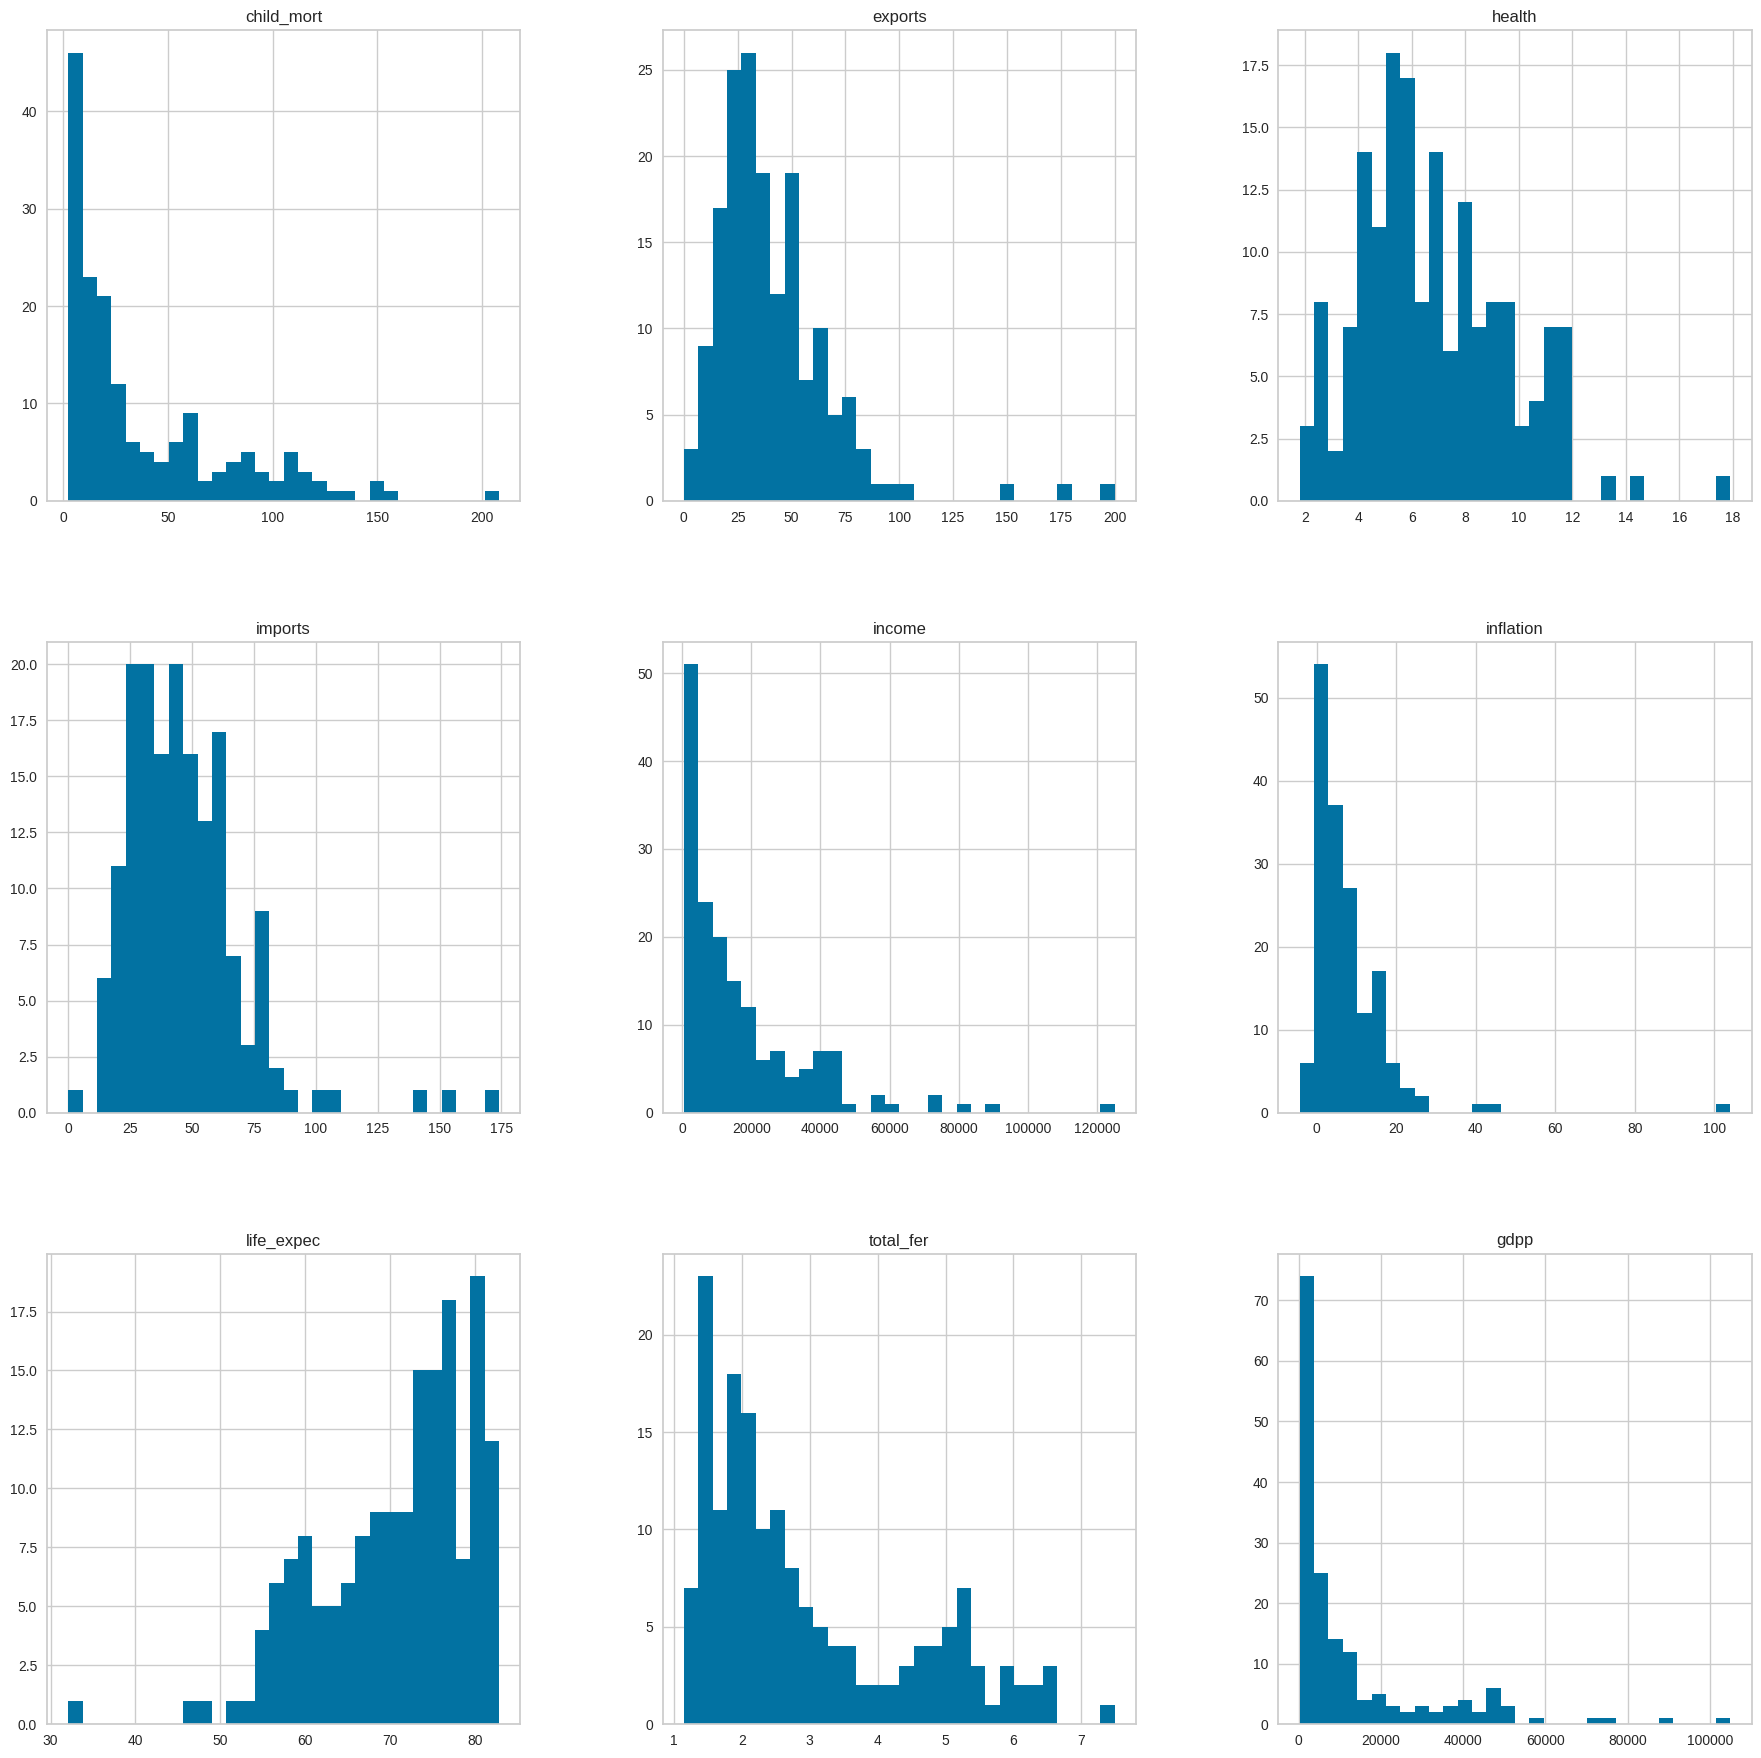

In [ ]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
            'life_expec', 'total_fer', 'gdpp']
help_df[features].hist(figsize=(22, 22), bins=30);

In [ ]:
help_df[help_df['child_mort'] > 150].value_counts()

child_mort  exports  health  imports  income  inflation  life_expec  total_fer  gdpp
160.0       16.8     13.10   34.5     1220    17.20      55.0        5.20       399     1
208.0       15.3     6.91    64.7     1500    5.45       32.1        3.33       662     1
dtype: int64

In [ ]:
help_df[help_df['life_expec'] < 50].value_counts()

child_mort  exports  health  imports  income  inflation  life_expec  total_fer  gdpp
99.7        39.4     11.10   101.0    2380    4.15       46.5        3.30       1170    1
149.0       11.8     3.98    26.5     888     2.01       47.5        5.21       446     1
208.0       15.3     6.91    64.7     1500    5.45       32.1        3.33       662     1
dtype: int64

Através dos histogramas observamos que:

* A quantidade de todos os atributos, exceto o atributo "life_expec", é baixa na maioria dos países do conjunto de dados.
* Ao contrário de outros atributos, o atributo "life_expec" é inclinado para a direita.

Com os histogramas, podemos extrair as seguintes informações:

- 30% dos países neste dataset possui alta taxa de mortalidade infantil (> 50)
>  ref: https://tabnet.datasus.gov.br/cgi/idb2000/fqc01.htm
- Mais de 95% dos países tem investimentos menores que 12% em saúde;
- Apenas 8 países (apróx.: 5%) possuem renda líquida e PIB per capta superior a 50.000;
- Apenas 1 país possui inflação acima de 50 pontos;
- Cerca de 4% dos países possuem expectativa de vida abaixo de 55 anos;
- A maior parte dos países concentra-se numa taxa de fecundidade de 1 a 6 filhos.

##Verificação de outliers

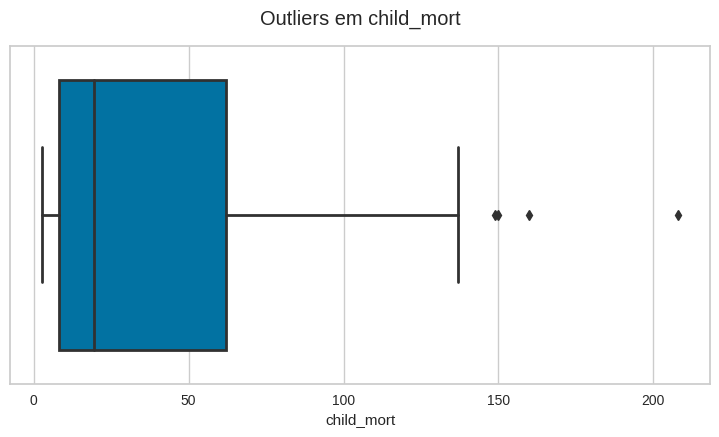

In [ ]:
sns.boxplot(data=help_df, x=help_df['child_mort'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em child_mort", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

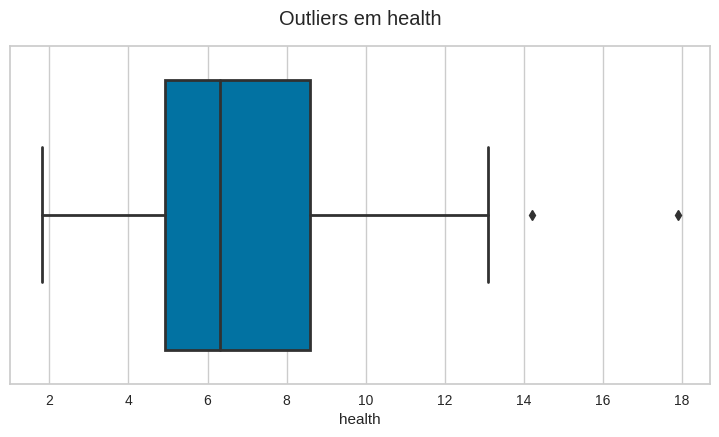

In [ ]:
sns.boxplot(data=help_df, x=help_df['health'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em health", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

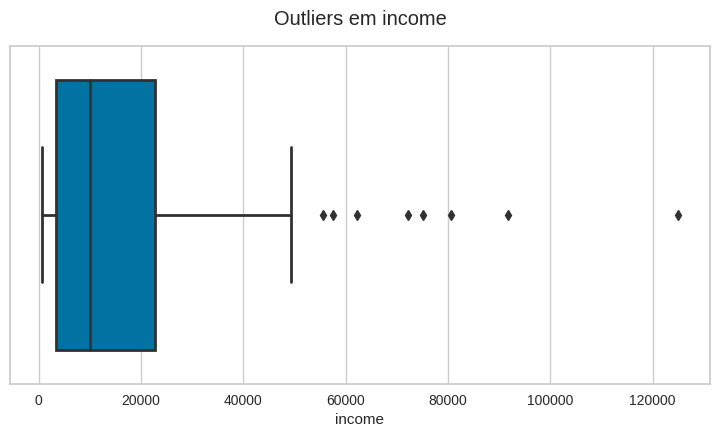

In [ ]:
sns.boxplot(data=help_df, x=help_df['income'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em income", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

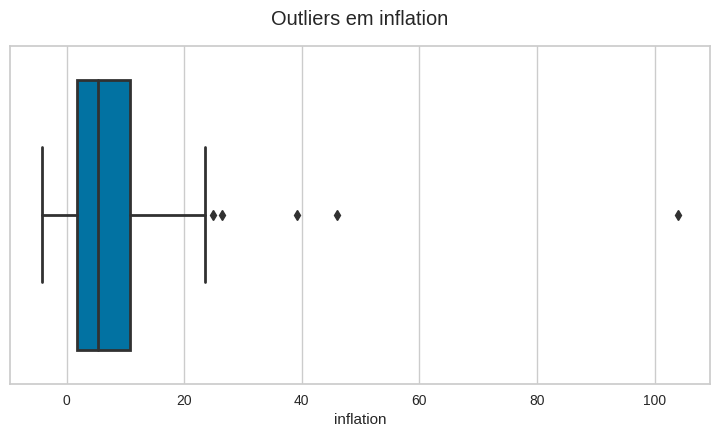

In [ ]:
sns.boxplot(data=help_df, x=help_df['inflation'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em inflation", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

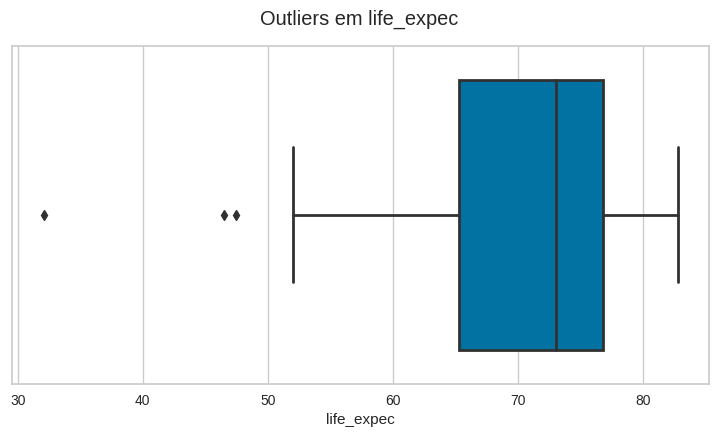

In [ ]:
sns.boxplot(data=help_df, x=help_df['life_expec'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em life_expec", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

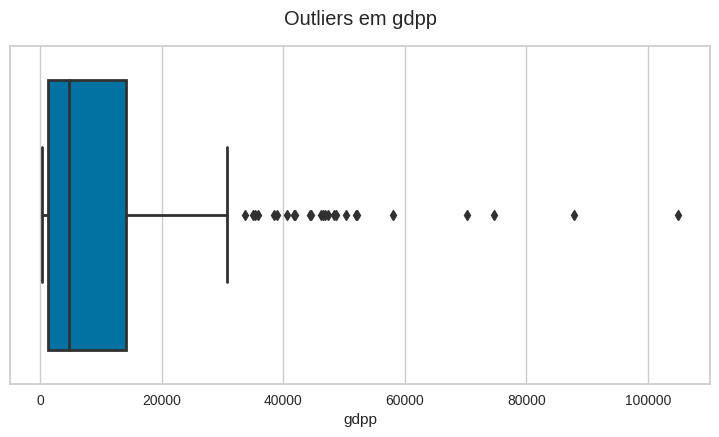

In [ ]:
sns.boxplot(data=help_df, x=help_df['gdpp'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em gdpp", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

##Intervalo interquartílico (IQR)

In [ ]:
# Calculando o IQR
Q1 = help_df['life_expec'].quantile(0.25)
Q3 = help_df['life_expec'].quantile(0.75)
IQR = Q3 - Q1

# Calculando os limites superior e inferior
inferior_limite = Q1 - (1.5 * IQR)
superior_limite = Q3 + (1.5 * IQR)

# Identificando os outliers
outliers = help_df[(help_df['life_expec'] < inferior_limite) | (help_df['life_expec'] > superior_limite)]

outliers

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170


Assim observamos que:

* Todos os atributos possuem outliers no lado direito (valores mais altos), exceto life_expec, que tem outliers no lado esquerdo (valores menores), indicando que geralmente a expectativa de vida na maioria dos países é superior a 50 anos, exceto em 3 países (Lesoto, Haiti, República Centro-Africana).
* Já podendo ser indicado como boas opções para ajuda financeira: Lesoto, Haiti e a República Centro-Africana.

##Análise multivariada

<Axes: >

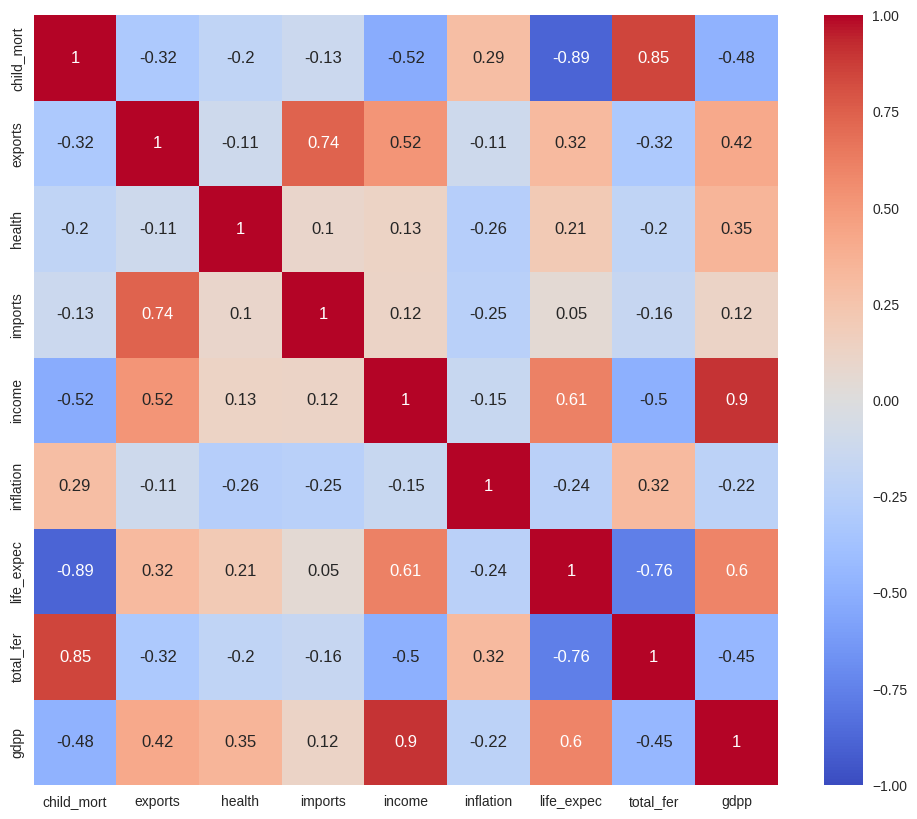

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(help_df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

A partir deste heatmap, é possível observar que as colunas:
- total_fer e child_mort possuem uma forte correlação positiva (cerca de 85%);
- life_expec e child_mort possuem uma forte correlação negativa (cerca de -89%);
- gdpp e income possuem uma forte correlação positiva (cerca de 90%).

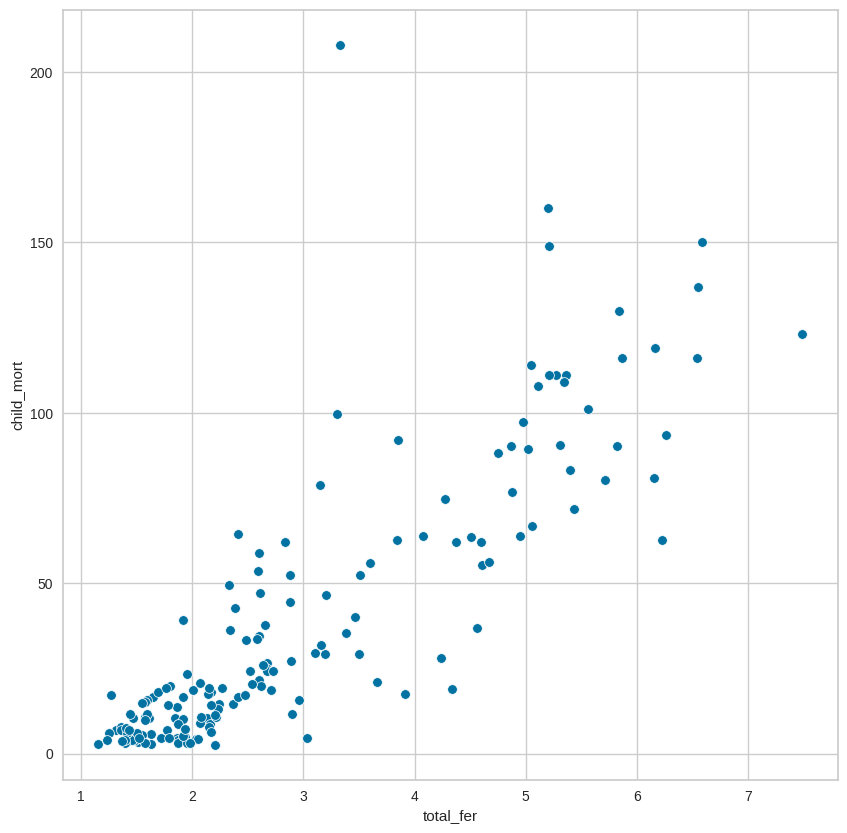

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=help_df, x='total_fer', y='child_mort')
plt.show()

A partir desta análise podemos inferir que quanto menor a mortalidade de crianças, menor o número de filhos que nasceriam de cada mulher. Em outras palavras, mulheres que tendem a ter um menor número de filhos (1 a 3, pelo menos), tem menores chances de mortes destes filhos.

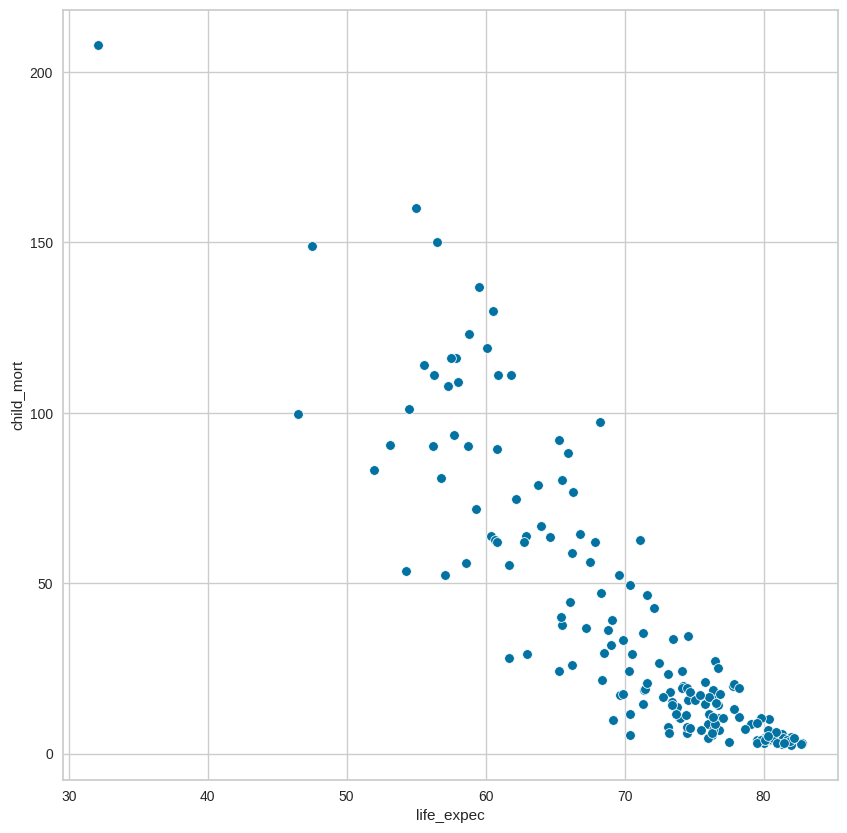

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=help_df, x='life_expec', y='child_mort')
plt.show()

A partir desta análise podemos inferir que a maior expectativa de vida está atrelada ao menor número de morte de crianças. E, quanto menor essa expectativa, maior o número de morte de crianças.

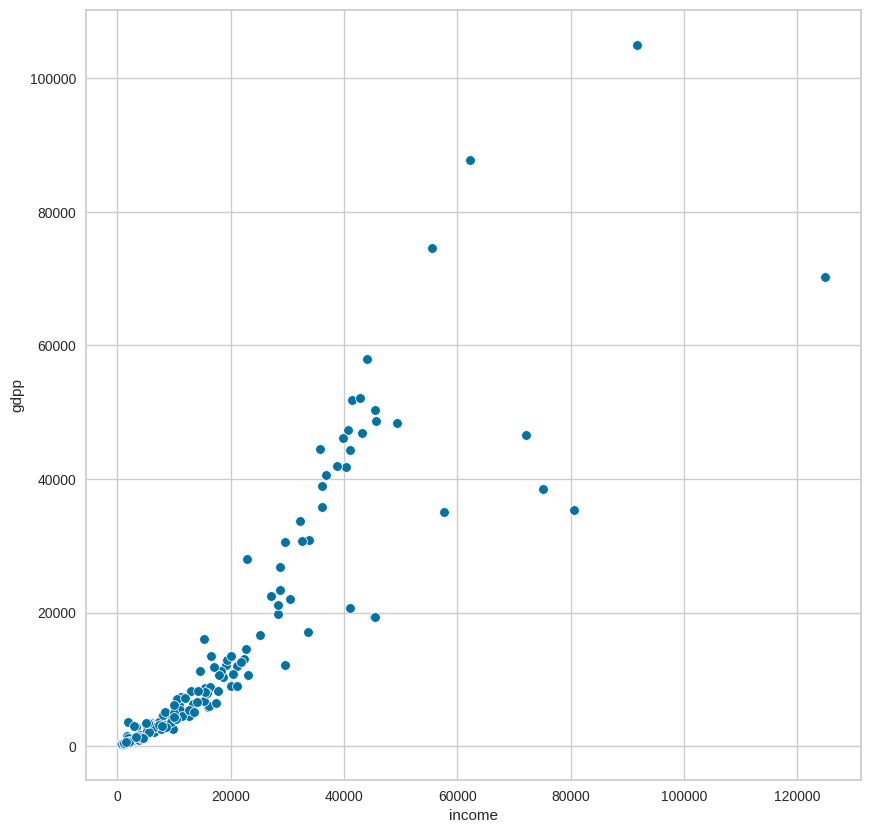

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=help_df, x='income', y='gdpp')
plt.show()

A partir deste gráfico é possível inferir que quando maior a renda líquida por pessoa, maior o PIB per capita dos países.

#Remoção de dados

In [ ]:
help_df.drop(columns=['total_fer', 'exports', 'imports'], inplace=True)

Pela grande correlação de dados, a coluna total_fer foi removida. As colunas exports e imports também foram removidas, pois não contemplam informações para o nosso objetivo final.

##Correlação após a remoção de colunas

<Axes: >

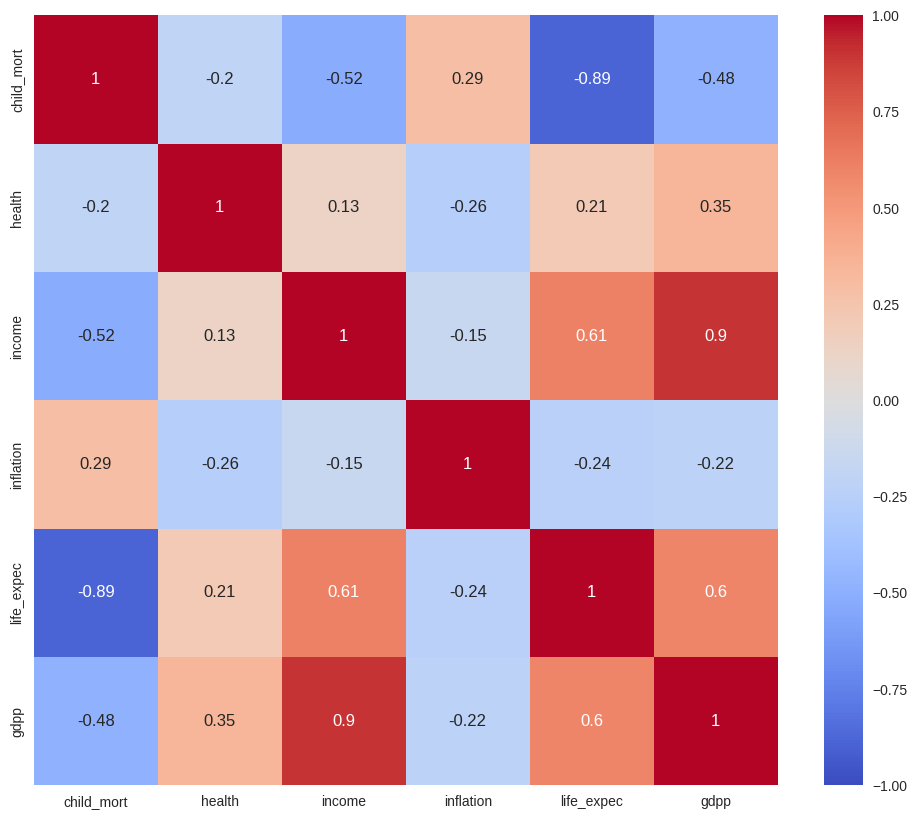

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(help_df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

##Distribuição dos dados após a remoção das colunas

In [ ]:
help_df.describe()

,child_mort,health,income,inflation,life_expec,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6.815689,17144.688623,7.781832,70.555689,12964.155689
std,40.328931,2.746837,19278.067698,10.570704,8.893172,18328.704809
min,2.600000,1.810000,609.000000,-4.210000,32.100000,231.000000
25%,8.250000,4.920000,3355.000000,1.810000,65.300000,1330.000000
50%,19.300000,6.320000,9960.000000,5.390000,73.100000,4660.000000
75%,62.100000,8.600000,22800.000000,10.750000,76.800000,14050.000000
max,208.000000,17.900000,125000.000000,104.000000,82.800000,105000.000000


Através das descrições dos atributos podemos concluir que:

* O valor máximo de "child_mort" é 208, o que indica que pelo menos um país no conjunto de dados tem uma taxa de mortalidade infantil muito alta;
* O "health" gasto médio é de 6,82%, indicando que a saúde é um setor importante na maioria dos países. No entanto, o desvio padrão é relativamente baixo, sugerindo que a distribuição dos gastos com saúde entre os países não é muito diversa;
* A média de "gdpp" é de 12.964,16 dólares, respectivamente. Com altos desvios padrão indicando uma ampla variação nos níveis de renda e PIB per capita entre os países; 
* O valor máximo de "income" é $125.000, o que sugere que pelo menos um país no conjunto de dados tem um nível de renda muito alto;
* A média da taxa de inflação é de 7,78%, com um alto desvio padrão de 10,57%, indicando que há uma grande variação nas taxas de inflação entre os países. O valor máximo é de 104, o que sugere que pelo menos um país no conjunto de dados experimentou inflação muito alta;
*  A expectativa de vida média é de 70,56 anos, com um desvio padrão relativamente baixo, indicando que a distribuição da expectativa de vida entre os países não é muito diversificada. O valor mínimo de 32,1 sugere que pelo menos um país tem uma expectativa de vida muito baixa, enquanto o valor máximo de 82,8 sugere que pelo menos um país tem uma expectativa de vida muito alta;

#Criação de nova coluna

Visto que a coluna "health" está como porcentagem do PIB per capita, e não nos fornece um valor claro para o país, será calculado o valor real de seus valores percentuais.

In [ ]:
help_df['real_health'] = help_df['health'] * help_df['gdpp']/100
help_df

,child_mort,health,income,inflation,life_expec,gdpp,real_health
country,,,,,,,
Afghanistan,90.2,7.58,1610,9.44,56.2,553,41.9174
Albania,16.6,6.55,9930,4.49,76.3,4090,267.8950
Algeria,27.3,4.17,12900,16.10,76.5,4460,185.9820
Angola,119.0,2.85,5900,22.40,60.1,3530,100.6050
Antigua and Barbuda,10.3,6.03,19100,1.44,76.8,12200,735.6600
...,...,...,...,...,...,...,...
Vanuatu,29.2,5.25,2950,2.62,63.0,2970,155.9250
Venezuela,17.1,4.91,16500,45.90,75.4,13500,662.8500
Vietnam,23.3,6.84,4490,12.10,73.1,1310,89.6040


#Análises específicas

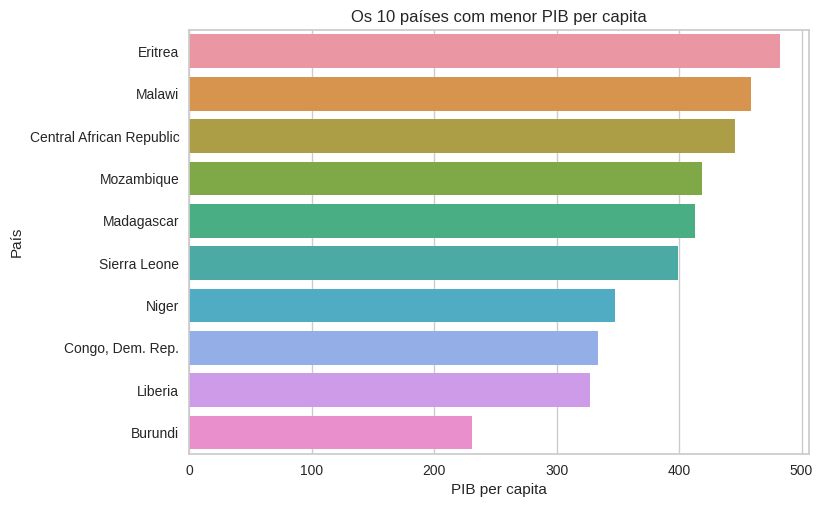

In [ ]:
df_sorted = help_df.sort_values(by='gdpp', ascending=False)
top_10 = df_sorted.tail(10)

sns.barplot(x='gdpp', y=top_10.index, data=top_10)

plt.xlabel('PIB per capita')
plt.ylabel('País')
plt.title('Os 10 países com menor PIB per capita')

plt.show()

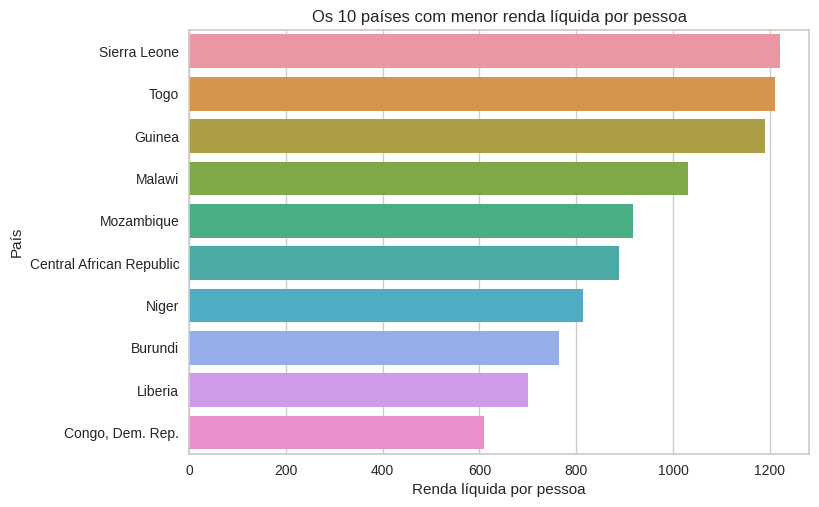

In [ ]:
df_sorted = help_df.sort_values(by='income', ascending=False)
top_10 = df_sorted.tail(10)

sns.barplot(x='income', y=top_10.index, data=top_10)

plt.xlabel('Renda líquida por pessoa')
plt.ylabel('País')
plt.title('Os 10 países com menor renda líquida por pessoa')

plt.show()

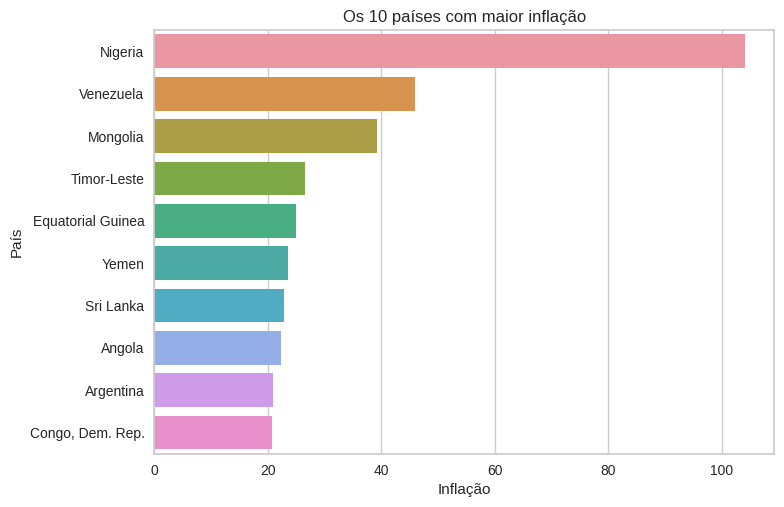

In [ ]:
df_sorted = help_df.sort_values(by='inflation', ascending=False)
top_10 = df_sorted.head(10)

sns.barplot(x='inflation', y=top_10.index, data=top_10)

plt.xlabel('Inflação')
plt.ylabel('País')
plt.title('Os 10 países com maior inflação')

plt.show()

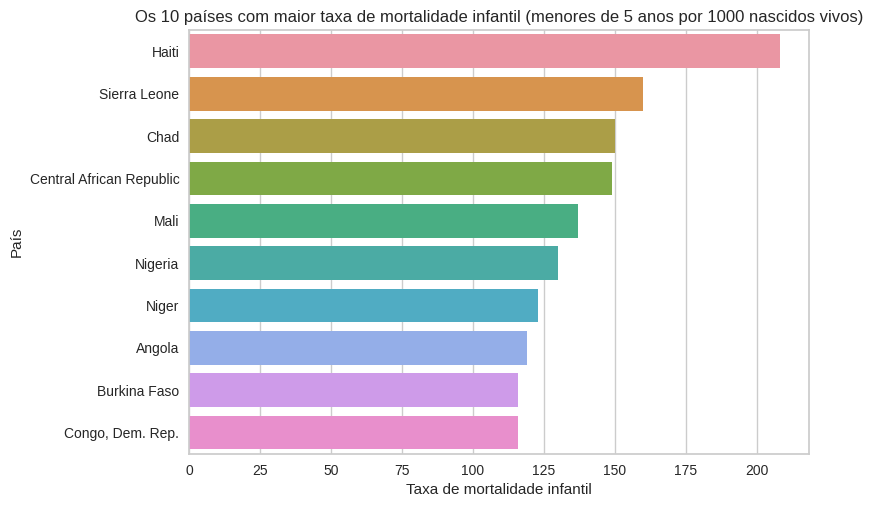

In [ ]:
df_sorted = help_df.sort_values(by='child_mort', ascending=False)
top_10 = df_sorted.head(10)

sns.barplot(x='child_mort', y=top_10.index, data=top_10)

plt.xlabel('Taxa de mortalidade infantil')
plt.ylabel('País')
plt.title('Os 10 países com maior taxa de mortalidade infantil (menores de 5 anos por 1000 nascidos vivos)')

plt.show()

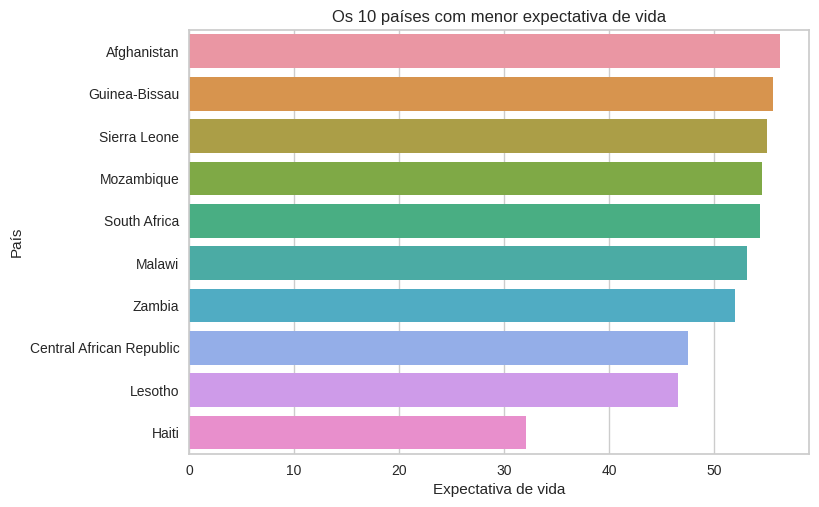

In [ ]:
df_sorted = help_df.sort_values(by='life_expec', ascending=False)
top_10 = df_sorted.tail(10)

sns.barplot(x='life_expec', y=top_10.index, data=top_10)

plt.xlabel('Expectativa de vida')
plt.ylabel('País')
plt.title('Os 10 países com menor expectativa de vida')

plt.show()

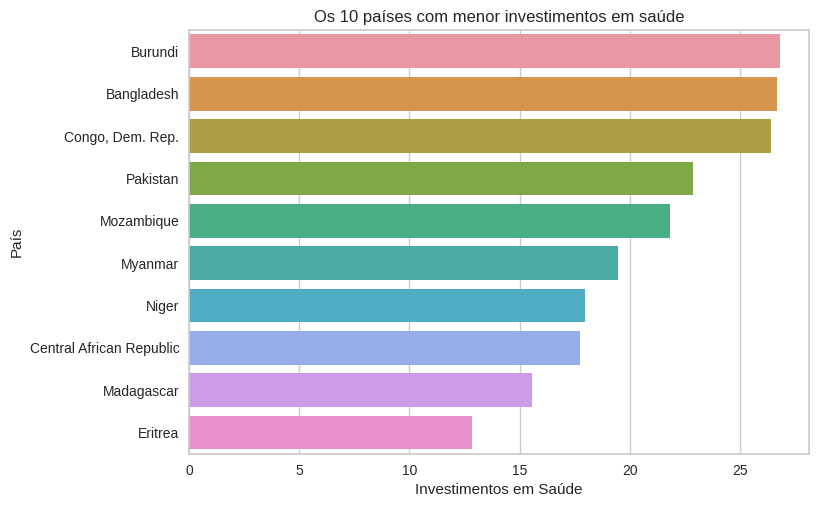

In [ ]:
df_sorted = help_df.sort_values(by='real_health', ascending=False)
top_10 = df_sorted.tail(10)

sns.barplot(x='real_health', y=top_10.index, data=top_10)

plt.xlabel('Investimentos em Saúde')
plt.ylabel('País')
plt.title('Os 10 países com menor investimentos em saúde')

plt.show()

#Backup do dataset

In [ ]:
backup = help_df.copy()

In [ ]:
help_df

,child_mort,health,income,inflation,life_expec,gdpp,real_health
country,,,,,,,
Afghanistan,90.2,7.58,1610,9.44,56.2,553,41.9174
Albania,16.6,6.55,9930,4.49,76.3,4090,267.8950
Algeria,27.3,4.17,12900,16.10,76.5,4460,185.9820
Angola,119.0,2.85,5900,22.40,60.1,3530,100.6050
Antigua and Barbuda,10.3,6.03,19100,1.44,76.8,12200,735.6600
...,...,...,...,...,...,...,...
Vanuatu,29.2,5.25,2950,2.62,63.0,2970,155.9250
Venezuela,17.1,4.91,16500,45.90,75.4,13500,662.8500
Vietnam,23.3,6.84,4490,12.10,73.1,1310,89.6040


#Aplicação dos algoritmos de Machine Learning

##Normalização dos dados

In [ ]:
X = StandardScaler().fit_transform(help_df)
X = pd.DataFrame(X, columns = help_df.columns, index=help_df.index[:])
X

,child_mort,health,income,inflation,life_expec,gdpp,real_health
country,,,,,,,
Afghanistan,1.291532,0.279088,-0.808245,0.157336,-1.619092,-0.679180,-0.565040
Albania,-0.538949,-0.097016,-0.375369,-0.312347,0.647866,-0.485623,-0.439218
Algeria,-0.272833,-0.966073,-0.220844,0.789274,0.670423,-0.465376,-0.484826
Angola,2.007808,-1.448071,-0.585043,1.387054,-1.179234,-0.516268,-0.532363
Antigua and Barbuda,-0.695634,-0.286894,0.101732,-0.601749,0.704258,-0.041817,-0.178771
...,...,...,...,...,...,...,...
Vanuatu,-0.225578,-0.571711,-0.738527,-0.489784,-0.852161,-0.546913,-0.501562
Venezuela,-0.526514,-0.695862,-0.033542,3.616865,0.546361,0.029323,-0.219310
Vietnam,-0.372315,0.008877,-0.658404,0.409732,0.286958,-0.637754,-0.538488


##Análise da silhueta com K-Means++

In [ ]:
def silhueta(X, y_km):
  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]

  silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

  fig, ax = plt.subplots()
  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i) / n_clusters)
      ax.barh(
          range(y_ax_lower, y_ax_upper),
          c_silhouette_vals, 
          height=1.0, edgecolor='none',
          color=color
      )
      yticks.append((y_ax_lower + y_ax_upper) / 2.)
      y_ax_lower += len(c_silhouette_vals)

  silhouette_avg = np.mean(silhouette_vals)

  ax.axvline(silhouette_avg, color="red", linestyle="--") 
  ax.set_yticks(yticks, cluster_labels + 1)
  ax.set_ylabel('Cluster')
  ax.set_xlabel('Silhouette coefficient')
  ax.plot()

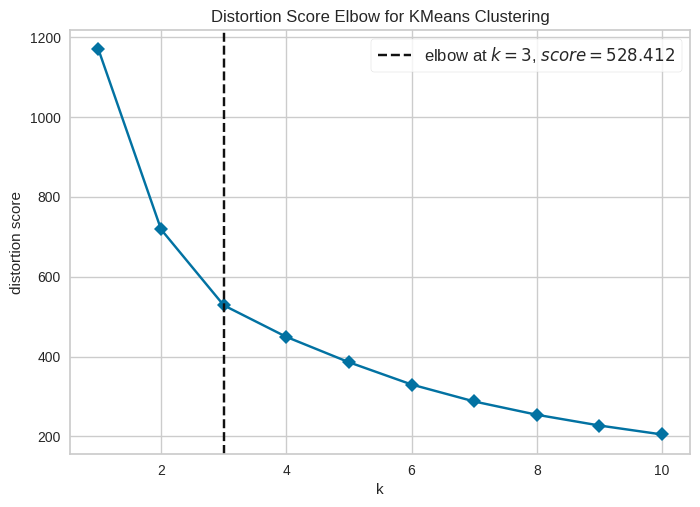

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(init='k-means++', n_init=10, random_state=3)

visualizer = KElbowVisualizer(model, k=(1,11), metric='distortion', timings=False)

visualizer.fit(X)
visualizer.poof()

Com base na visualização do método do cotovelo, o valor de k = 3 é interessante para uso.

###Visualização da partição

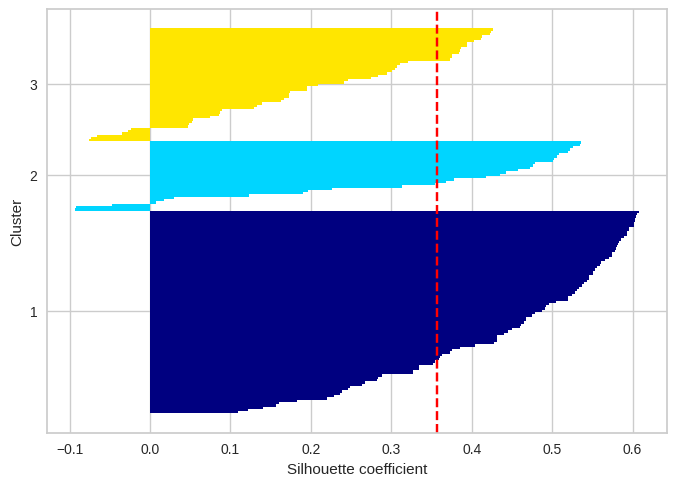

In [ ]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=4)
y_km = km.fit_predict(X)
silhueta(X, y_km)

##PCA - Principal Component Analysis

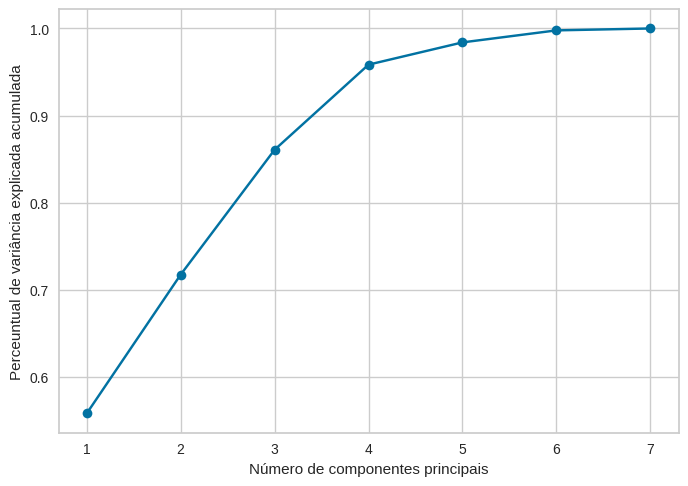

In [ ]:
pca = PCA()
pca.fit(X)

variancia_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
eixo_x = list(range(1, len(variancia_explicada_acumulada)+1))
ax.plot(eixo_x, variancia_explicada_acumulada, marker="o")
ax.set_xlabel("Número de componentes principais")
ax.set_ylabel("Perceuntual de variância explicada acumulada")
ax.set_xticks(eixo_x)
plt.show()

De acordo com os resultados obtido no gráfico acima, o número de 4 clusters como o k ideal.

###Criação do novo dataset

In [ ]:
pca = PCA(n_components=4)
X2 = pca.fit_transform(X)

###Visualização do novo dataset

In [ ]:
pd.DataFrame(X2, index=help_df.index)

,0,1,2,3
country,,,,
Afghanistan,-2.041581,1.131614,0.495503,-0.217742
Albania,-0.066347,-0.385242,-1.032112,0.359763
Algeria,-0.512743,-1.391396,-0.148272,0.444669
Angola,-2.578808,-0.517257,1.636752,-0.593047
Antigua and Barbuda,0.550959,-0.513715,-0.938403,-0.109885
Argentina,0.258708,-0.586152,0.332409,1.389998
Armenia,-0.587061,-0.920704,-0.794423,0.090269
Australia,3.515886,0.297080,0.507219,-0.312941
Austria,3.715459,1.015092,0.564279,0.089732


###Análise do agrupamento com novos dados

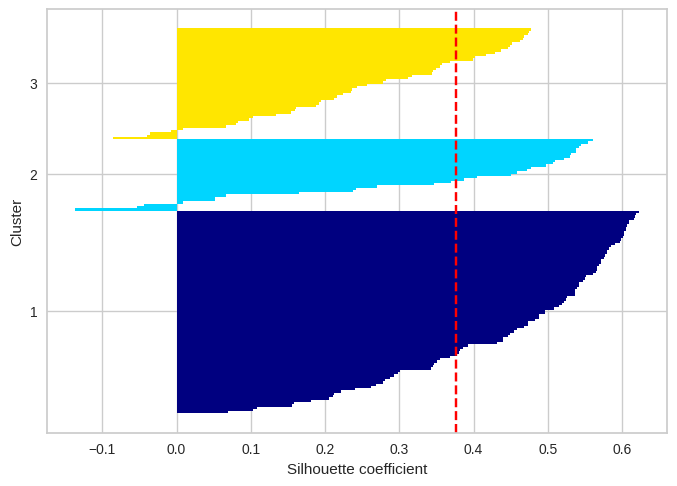

In [ ]:
y_km2 = km.fit_predict(X2)
silhueta(X2, y_km2)

<Axes: >

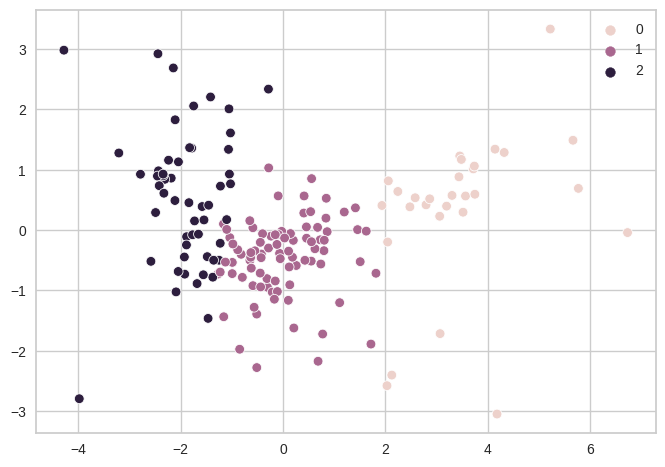

In [ ]:
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=y_km2)

##Hierarchical Clustering + PCA

In [ ]:
def dendograma(data):
  plt.figure(figsize=(10,5), dpi=200, linewidth=0.5)
  plt.plot(linewidth=1)
  dendrogram(linkage(data, method='ward'), truncate_mode='level', p=6)
  plt.title('Dendrograma')
  plt.xlabel('Customers')
  plt.ylabel('Euclidean distances')
  plt.show()

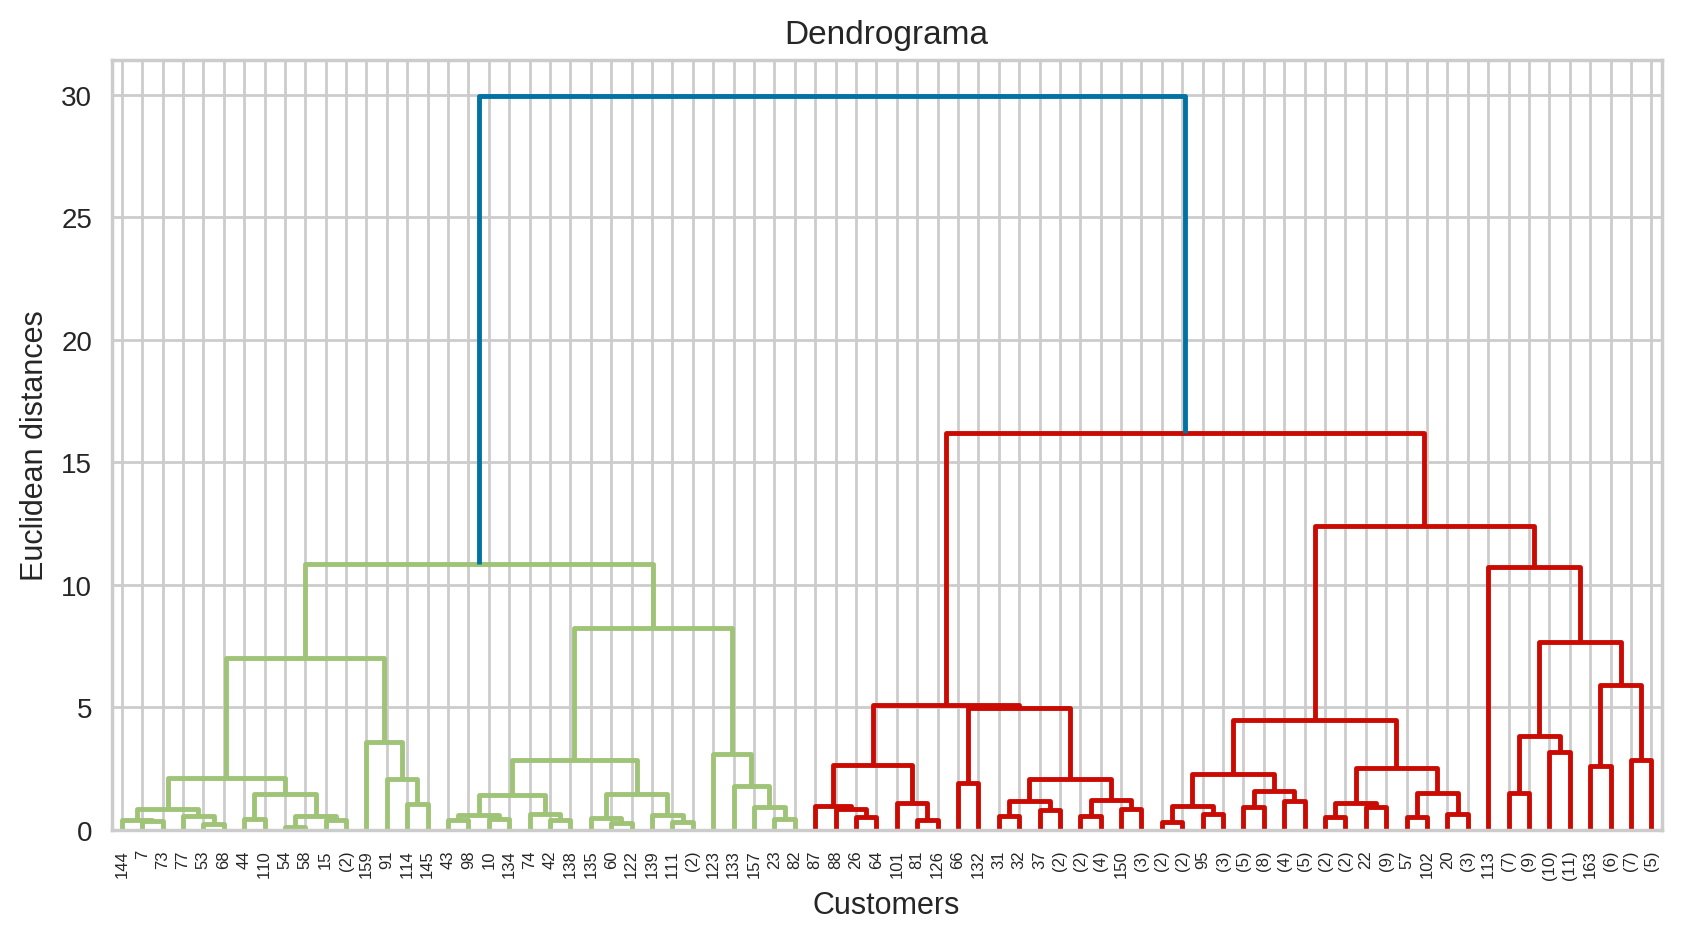

In [ ]:
dendograma(X2)

In [ ]:
def plot_hclust(data, y_hc):
  plt.figure(figsize=(10, 10))
  plt.scatter(
    data[y_hc == 0, 0], data[y_hc == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
  )
  plt.scatter(
    data[y_hc == 1, 0], data[y_hc == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
  )
  plt.scatter(
    data[y_hc == 2, 0], data[y_hc == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
  )
  plt.legend(scatterpoints=1)
  plt.grid()
  plt.show()

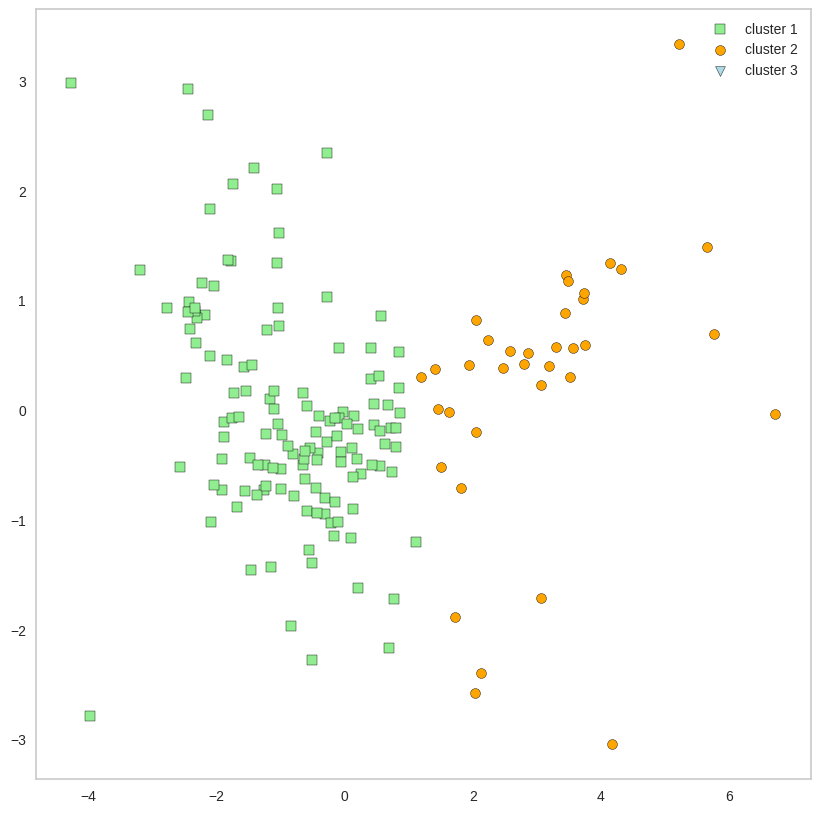

In [ ]:
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = ac.fit_predict(X2)
plot_hclust(X2, labels)

In [ ]:
silhouette_coef = []
for k in range(2,15):
  agg = AgglomerativeClustering(n_clusters=k)
  agg.fit(X2)
  score = silhouette_score(X2, agg.fit_predict(X2))
  silhouette_coef.append(score)

In [ ]:
def plot_avaliacao(sh_score, name, x=range(2,11)):    
  fig, ax = plt.subplots(figsize=(10,5), dpi=100)
  ax.plot(x, sh_score, marker='o', ms=9)
  ax.set_xlabel("Número de Clusters", labelpad=20)
  ax.set_ylabel("Silhouette Coeficiente", labelpad=20)
  plt.suptitle(f'Avaliando {name} Clustering',y=0.9)
  plt.tight_layout(pad=3)
  plt.show()

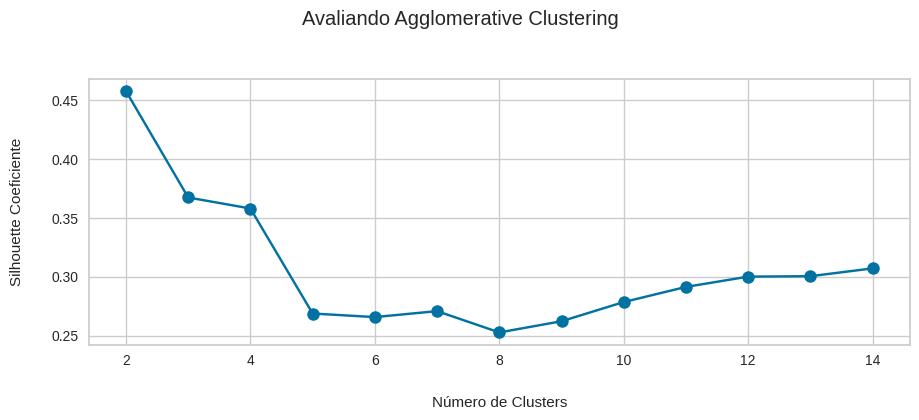

In [ ]:
plot_avaliacao(silhouette_coef, 'Agglomerative', x=range(2,15))

De acordo com o diagrama acima, n_clusters=4 é apropriado. Portanto, implementamos o algoritmo Aglomerativo com n_clusters=4

In [ ]:
#Configuração para visualizar linhas
pd.set_option('display.max_rows', None)

In [ ]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X2)

# Armazenar resultado do Aglomerativo
pred = agg.labels_

# Avaliando os resultados por silhueta
sh_score = silhouette_score(X2, pred)

# Resultados
print(f"Silhouette Coefficient: {sh_score:.2f}")

# Transformando X2 em um pandas DataFrame
X2_df = pd.DataFrame(X2, index=help_df.index)

# # Adicionando a coluna de clusters ao dataframe X2_df
X2_df['cluster'] = pred
X2_df

Silhouette Coefficient: 0.36


,0,1,2,3,cluster
country,,,,,
Afghanistan,-2.041581,1.131614,0.495503,-0.217742,2
Albania,-0.066347,-0.385242,-1.032112,0.359763,0
Algeria,-0.512743,-1.391396,-0.148272,0.444669,0
Angola,-2.578808,-0.517257,1.636752,-0.593047,0
Antigua and Barbuda,0.550959,-0.513715,-0.938403,-0.109885,0
Argentina,0.258708,-0.586152,0.332409,1.389998,0
Armenia,-0.587061,-0.920704,-0.794423,0.090269,0
Australia,3.515886,0.297080,0.507219,-0.312941,1
Austria,3.715459,1.015092,0.564279,0.089732,1


In [ ]:
X2_df.loc[X2_df['cluster'] == 3]

,0,1,2,3,cluster
country,,,,,
Nigeria,-3.978094,-2.794443,6.83463,4.552515,3


In [ ]:
X2_df.loc[X2_df['cluster'] == 2]

,0,1,2,3,cluster
country,,,,,
Afghanistan,-2.041581,1.131614,0.495503,-0.217742,2
Benin,-2.109877,0.490455,0.014101,-1.384934,2
Botswana,-1.046265,0.929158,0.391386,-0.043212,2
Burkina Faso,-2.234703,1.159284,0.553395,-0.685738,2
Burundi,-1.744603,2.057783,0.633119,0.767506,2
Cameroon,-2.182902,0.861984,0.219138,-1.268062,2
Central African Republic,-3.205741,1.278441,0.938827,-2.095227,2
Chad,-2.783210,0.926608,0.959589,-1.472145,2
"Congo, Dem. Rep.",-2.431916,0.982975,1.423757,0.361454,2


In [ ]:
X2_df.loc[X2_df['cluster'] == 1]

,0,1,2,3,cluster
country,,,,,
Australia,3.515886,0.297080,0.507219,-0.312941,1
Austria,3.715459,1.015092,0.564279,0.089732,1
Bahamas,1.414293,0.369111,-0.331422,-0.266952,1
Belgium,3.436207,0.883455,0.501546,0.144660,1
Brunei,2.030750,-2.578450,1.447434,-1.118023,1
Canada,3.736496,1.061702,0.679550,0.310700,1
Cyprus,1.815467,-0.714794,-0.321963,-0.425238,1
Czech Republic,1.456569,0.008530,-0.802781,-0.098080,1
Denmark,4.319299,1.287155,1.194773,0.096734,1


Os países indicados para ajuda financeira neste trabalho são os países que apresentam um baixo nível de indicadores de desenvolvimento, que estão em maioria nos clusters 2 e 3.

Sendo assim, os países com piores indicadores são: 
- Haiti: Maior índice de mortalidade infantil e um dos com menor expectativa de vida;
- Nigeria: Menor investimento em saúde, alta taxa de mortalidade infantil, maior inflação, um dos menores taxas de renda líquida por pessoa e menor PIB per capita;
- Central African Republic: Um dos menores PIB per capita, renda líquida por pessoa, um dos com maiores taxas de mortalidade infantil e com menor expectativa de vida e investimentos em saúde;
- Chad: Um dos países com maiores taxas de mortalidade infantil;
- Angola: Um dos países com maiores taxas de inflação e mortalidade infantil.

Portanto, os resultados obtidos são consistentes com a análise realizada na seção de Análise Exploratória.